<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

**Every plot should**:

- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Visualize the Data
Interpretations for these visualizations can be found in 'test-optional_eda'

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
states = pd.read_csv('../data-clean/states_viz.csv')
colleges = pd.read_csv('../data-clean/colleges_viz.csv')
alt_criteria = pd.read_csv('../data/2019-2020_alt_criteria.csv')

## Score-related relatioinships

In [30]:
max(states.composite)

1.97024361290177

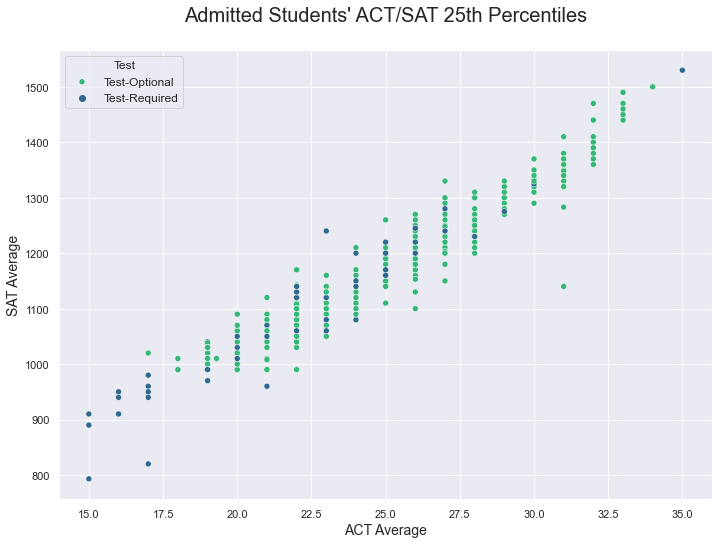

In [29]:

q1 = sns.scatterplot(data = colleges, x = 'act_q1', y = 'sat_q1', hue = 'test_optional?', palette='viridis')

q1.set_title("Admitted Students' ACT/SAT 25th Percentiles", y=1.05, fontsize=20);
q1.set_xlabel("ACT Average", fontsize=14)
q1.set_ylabel("SAT Average", fontsize=14);
q1.legend(title='Test', labels=['Test-Optional','Test-Required'], fontsize=12)

fig1 = q1.get_figure()
fig1.savefig('../viz/q1.png');

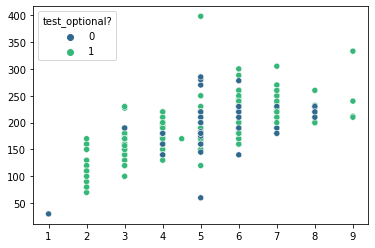

In [4]:
q1 = list(colleges.act_q1)
q3 = list(colleges.act_q3)

x = [q3[i]-q1[i] for i in range(len(colleges.act_q1+1))]

sq1 = list(colleges.sat_q1)
sq3 = list(colleges.sat_q3)

y = [sq3[i]-sq1[i] for i in range(len(colleges.act_q1+1))]

q1 = sns.scatterplot(data = colleges, x = x, y = y, hue = 'test_optional?', 
                palette='viridis')

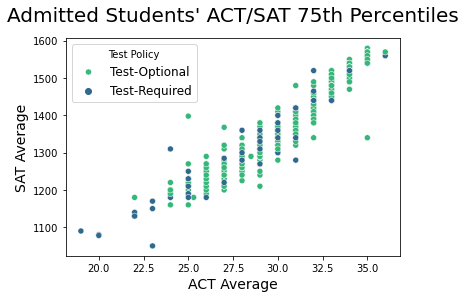

In [5]:
q3 = sns.scatterplot(data = colleges, x = 'act_q3', y = 'sat_q3', 
                     hue = 'test_optional?', 
                     palette='viridis')

q3.set_title("Admitted Students' ACT/SAT 75th Percentiles", y=1.05, fontsize=20);
q3.set_xlabel("ACT Average", fontsize=14)
q3.set_ylabel("SAT Average", fontsize=14);
q3.legend(title='Test Policy', labels=['Test-Optional','Test-Required'], fontsize=12)

fig2 = q3.get_figure()
fig2.savefig('../viz/q3.png');

In [6]:
(colleges.loc[colleges['act_q1'] > 34, :])

,Unnamed: 0,school,test_optional?,policy_period,policy_details,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
5,5,California Institute of Technology,0,2.0,CalTech has adopted a two-year Test Blind poli...,8367,0.064,1530.0,1560.0,35.0,36.0


In [7]:
colleges.act_q1

0      32.0
1      33.0
2      32.0
3      33.0
4      33.0
       ... 
411    17.0
412    19.0
413    21.0
414    22.0
415    17.0
Name: act_q1, Length: 416, dtype: float64

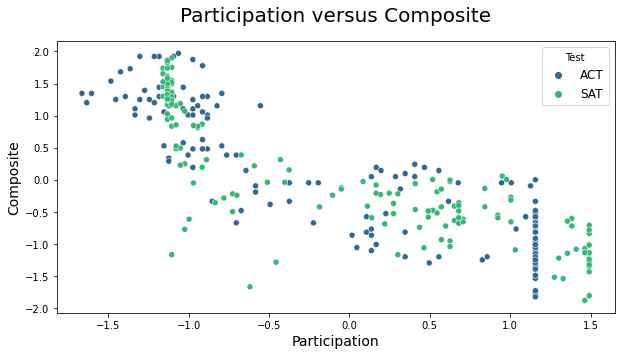

In [8]:
# Participation vs Composite based on test
plt.figure(figsize=(20,10))
participation = sns.scatterplot(data = states, x='participation', y='composite', 
                                hue = 'test', 
                                palette='viridis')
participation.set_title("Participation versus Composite", y=1.05, fontsize=20);
participation.set_xlabel("Participation", fontsize=14)
participation.set_ylabel("Composite", fontsize=14);
participation.legend(title='Test', fontsize=12)

fig3 = participation.get_figure()
fig3.savefig('../viz/participation.png');

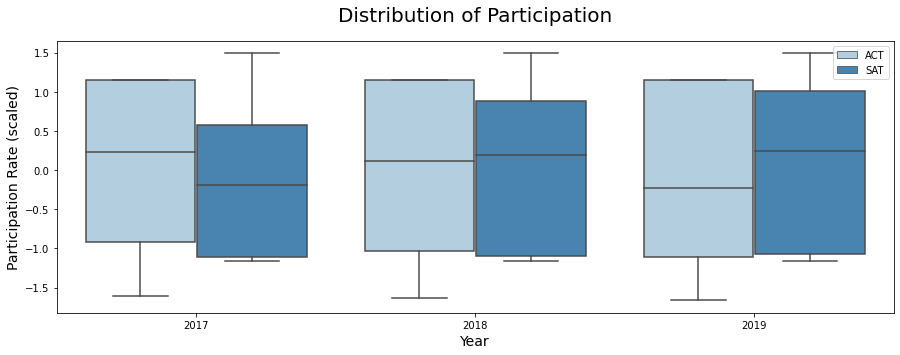

In [9]:
# Draw a nested boxplot to show scores by day and time
plt.figure(figsize=(15,5))
box_plot = sns.boxplot(x="year", y="participation", hue='test',
            palette='Blues',
            data=states)
box_plot.set_title("Distribution of Participation", y=1.05, fontsize=20);
box_plot.set_xlabel('Year', fontsize=14);
box_plot.set_ylabel('Participation Rate (scaled)', fontsize=14); 
plt.legend(loc='upper right')

for i in box_plot.containers:
    box_plot.bar_label(i,)
    
fig7 = box_plot.get_figure()
fig7.savefig('../viz/box_plot.png');

## Non-Score Variables

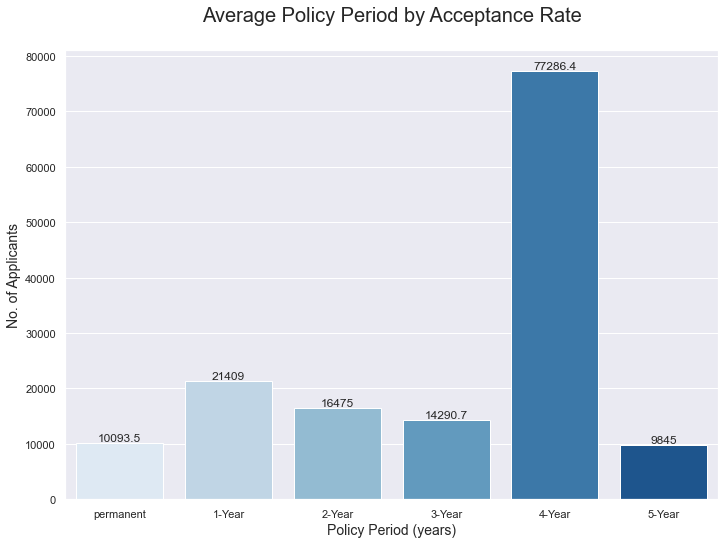

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
width = 0.35
policy_period = ['permanent', '1-Year', '2-Year', '3-Year', '4-Year', '5-Year'] 

applicants_means = colleges.groupby(by='policy_period').mean()['number_of_applicants']

applicant_mean_plot = sns.barplot(data = colleges, 
                                  x = colleges.groupby(by='policy_period').mean()['number_of_applicants'].index, 
                                  y = colleges.groupby(by='policy_period').mean()['number_of_applicants'], 
                                  palette = 'Blues')
applicant_mean_plot.set_title("Average Policy Period by Acceptance Rate", y=1.05, fontsize=20);
applicant_mean_plot.set_xlabel('Policy Period (years)', fontsize=14);
applicant_mean_plot.set_ylabel('No. of Applicants', fontsize=14); 
applicant_mean_plot.set_xticklabels(policy_period)

for i in applicant_mean_plot.containers:
    applicant_mean_plot.bar_label(i,)
    
fig4 = applicant_mean_plot.get_figure()
fig4.savefig('../viz/applicant_mean_plot.png');

count       416.000000
mean      17481.759615
std       17447.621897
min         211.000000
25%        5313.000000
50%       11622.000000
75%       23599.750000
max      111322.000000
Name: number_of_applicants, dtype: float64


/Users/kaitcrawford/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


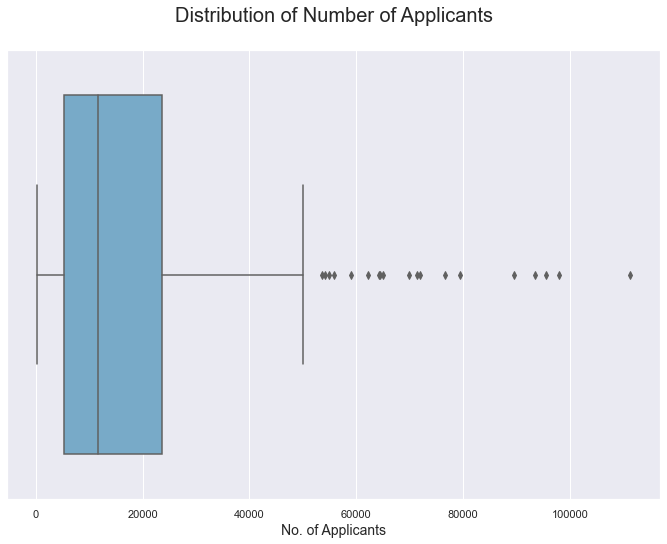

In [12]:
print(colleges.number_of_applicants.describe())
num_apps = sns.boxplot(colleges.number_of_applicants, palette = 'Blues')

num_apps.set_title("Distribution of Number of Applicants", y=1.05, fontsize=20);
num_apps.set_xlabel('No. of Applicants', fontsize=14); 

fig15 = num_apps.get_figure()
fig15.savefig('../viz/num_apps.png');

In [13]:
colleges.sort_values(by='number_of_applicants').tail(1)

,Unnamed: 0,school,test_optional?,policy_period,policy_details,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
24,24,University of California—Los Angeles,1,4.0,The UC system has adopted a two-year test opti...,111322,0.123,1290.0,1510.0,27.0,34.0


In [14]:
# College with the few
colleges.sort_values(by='number_of_applicants').tail(1)

,Unnamed: 0,school,test_optional?,policy_period,policy_details,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
24,24,University of California—Los Angeles,1,4.0,The UC system has adopted a two-year test opti...,111322,0.123,1290.0,1510.0,27.0,34.0


In [15]:
colleges.policy_period.unique()

array([ 1.,  2.,  0.,  4.,  3.,  5., nan])

In [16]:
colleges.loc[colleges.policy_period == 0, 'accept_rate'].count()

158

In [17]:
min(colleges.loc[colleges.policy_period == 0, 'accept_rate'])

0.073

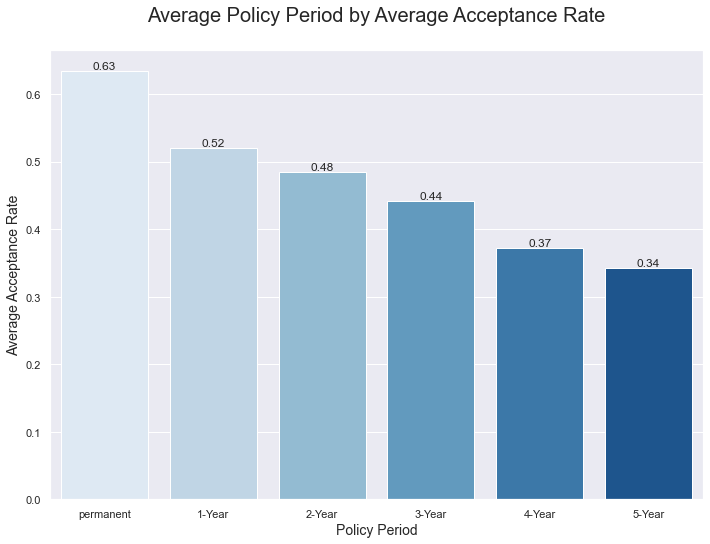

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
width = 0.35

accept_policy = sns.barplot(data = colleges, 
                            x = colleges.groupby(by='policy_period').mean()['accept_rate'].index, 
                            y = colleges.groupby(by='policy_period').mean()['accept_rate'], 
                            palette = 'Blues')
accept_policy.set_title("Average Policy Period by Average Acceptance Rate", y=1.05, fontsize=20)
accept_policy.set_xlabel('Policy Period', fontsize=14)
accept_policy.set_ylabel('Average Acceptance Rate', fontsize=14)
accept_policy.set_xticklabels(policy_period)

for i in accept_policy.containers:
    accept_policy.bar_label(i,fmt='%.2f')
    
fig5 = accept_policy.get_figure()
fig5.savefig('../viz/accept_policy.png');

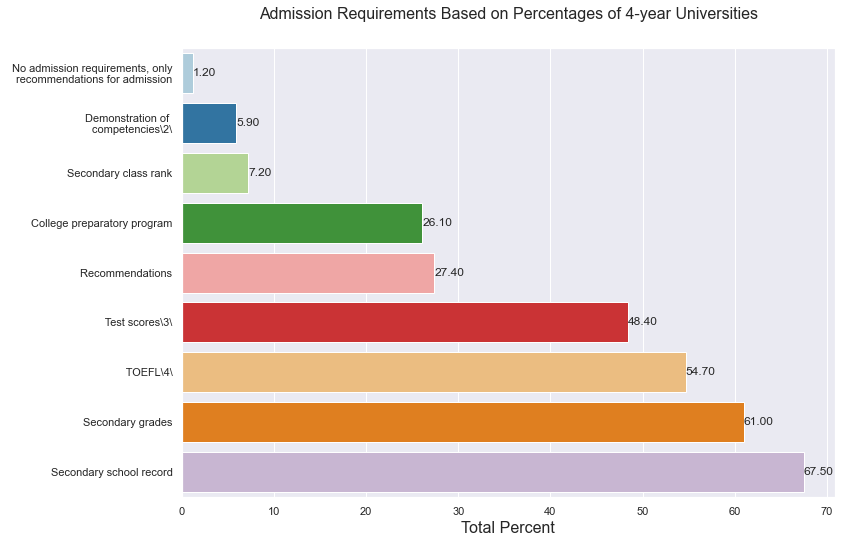

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
width = 0.35

alt_plot = sns.barplot(data=alt_criteria, x='total', y = 'requirement', order=alt_criteria.sort_values('total').requirement, palette = 'Paired');

alt_plot.set_title("Admission Requirements Based on Percentages of 4-year Universities", y=1.05, fontsize=16)
alt_plot.set_xlabel('Total Percent', fontsize=16)
alt_plot.set_ylabel('', fontsize=14)

for i in alt_plot.containers:
    alt_plot.bar_label(i,fmt='%.2f')
    
fig6 = alt_plot.get_figure()
fig6.savefig('../viz/alt_plot.png');

This additional data was pulled in to understand how standardized scores fit into the admissions proess. It is clear that standardized scores are already not used as frequently by 4-year universities as grades and secondary school performance. 